In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
df=pd.read_csv('C:\\Users\\pooja\\Desktop\\tips_dataset.csv')
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [23]:
print("no.of customer :  " + str(len(df)))

no.of customer :  244


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<Axes: xlabel='sex', ylabel='count'>

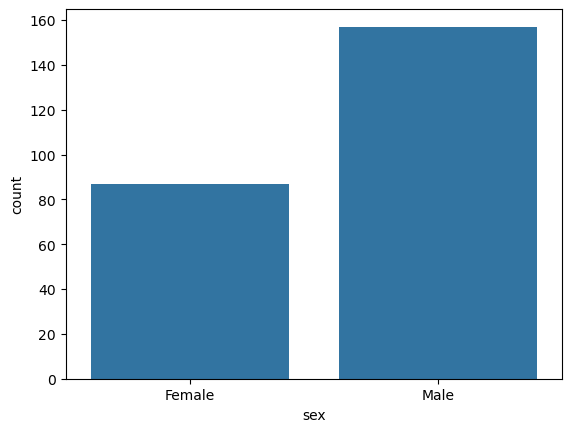

In [21]:
sns.countplot( x='sex' , data=df)

<Axes: ylabel='Frequency'>

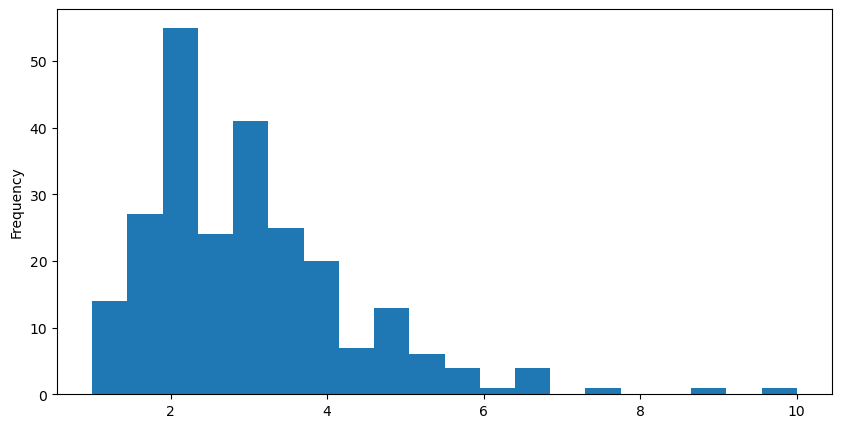

In [25]:
df['tip'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='day', ylabel='count'>

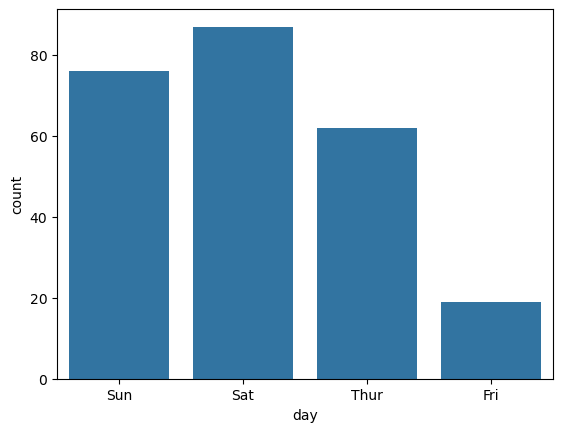

In [59]:
sns.countplot(x='day', data=df)

<Axes: xlabel='time', ylabel='count'>

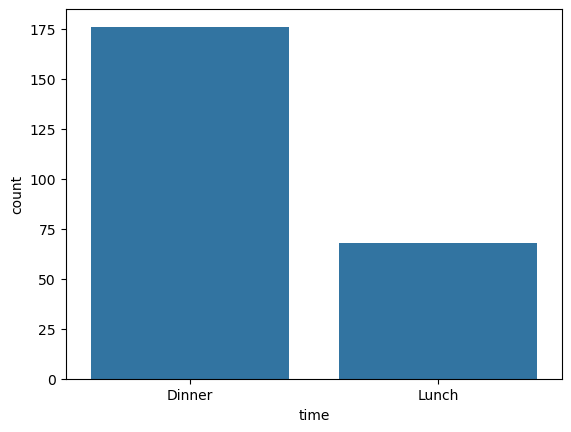

In [61]:
sns.countplot(x='time', data=df)

<Axes: xlabel='time', ylabel='tip'>

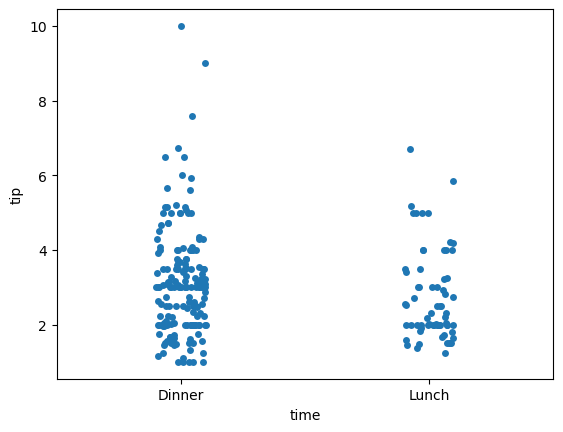

In [62]:
sns.stripplot(y='tip' , x='time', data=df)

<Axes: xlabel='sex', ylabel='tip'>

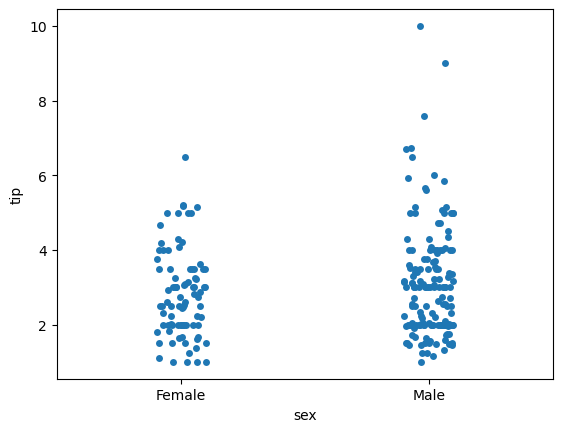

In [35]:
sns.stripplot(y='tip' , x='sex', data=df )

<Axes: xlabel='count', ylabel='day'>

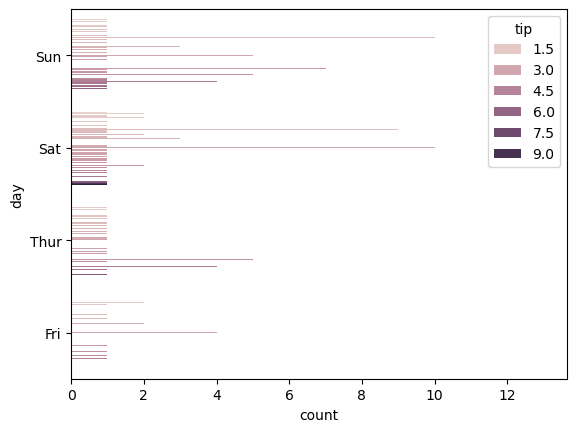

In [50]:
sns.countplot(hue='tip' , y='day' , data=df)

<Axes: xlabel='count', ylabel='size'>

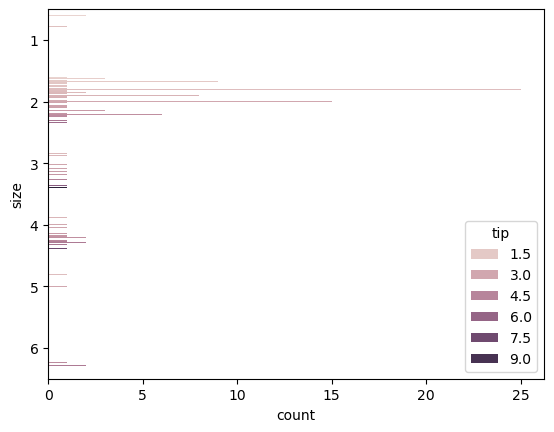

In [47]:
sns.countplot(hue='tip' , y='size', data=df)

In [52]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

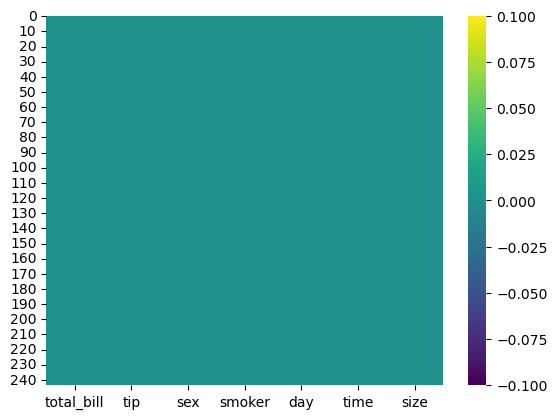

In [58]:
sns.heatmap(df.isnull(), cmap='viridis')

In [63]:
df.dropna(inplace=True)

In [75]:
#to drop unneccesary column
cols__to_drop=['time','size', 'smoker']
df=df.drop(columns=[col for col in cols__to_drop if col in df], axis=1)
df.head()

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [76]:
sex=pd.get_dummies(df['sex'], drop_first=True).astype(int)
sex.head

<bound method NDFrame.head of      Male
0       0
1       1
2       1
3       1
4       0
..    ...
239     1
240     0
241     1
242     1
243     0

[244 rows x 1 columns]>

In [77]:
df=pd.concat([df,sex], axis=1)
df.head()

,total_bill,tip,sex,Male
0,16.99,1.01,Female,0
1,10.34,1.66,Male,1
2,21.01,3.50,Male,1
3,23.68,3.31,Male,1
4,24.59,3.61,Female,0


In [78]:
df.drop('sex' , axis=1, inplace=True)

In [79]:
df.head()

,total_bill,tip,Male
0,16.99,1.01,0
1,10.34,1.66,1
2,21.01,3.50,1
3,23.68,3.31,1
4,24.59,3.61,0


<Axes: xlabel='tip'>

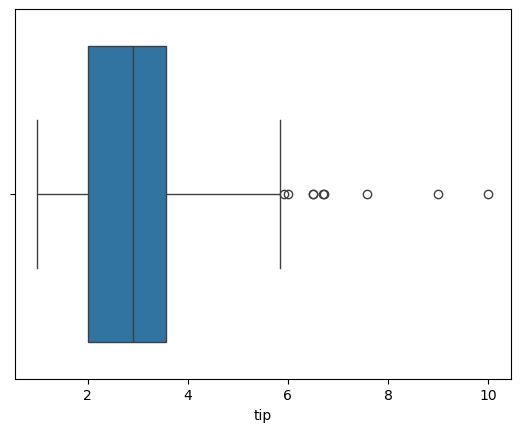

In [84]:
column='tip'
#check for outliers
sns.boxplot(x=df[column].dropna() , data=df)

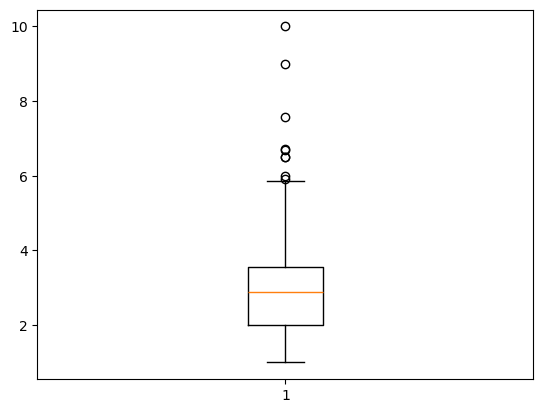

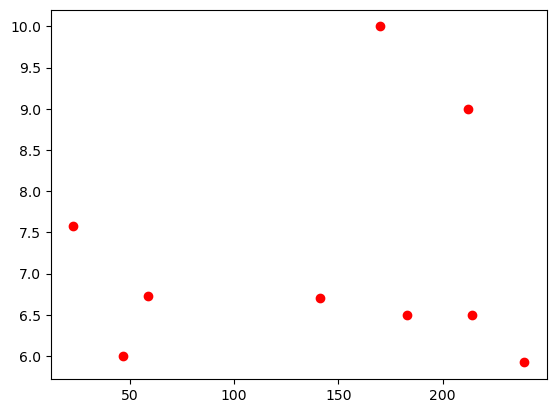

In [85]:
#filter out the outliers
#check outliers through IQR method
# Calculate the IQR for a specific column in the dataset
column_name = "tip"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1


# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]



# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [117]:
df.head()

,total_bill,tip,Male
0,16.99,1.01,0.0
1,10.34,1.66,1.0
2,21.01,3.50,1.0
3,23.68,3.31,1.0
4,24.59,3.61,0.0


In [86]:
print(df.dtypes)


total_bill    float64
tip           float64
Male            int32
dtype: object


In [113]:
df=df.astype(float)
print(df.dtypes)

total_bill    float64
tip           float64
Male          float64
dtype: object


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [118]:
X=df[["total_bill"]].values  # feature
y=df['tip'].values   #target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [119]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.5449381659234664


RIDGE REGRESSION

In [120]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.5449458342338539


In [ ]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))


Lasso Regression R2: 0.545076817885791


DECISION TREE REGRESSION

In [126]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: -0.06898287247700985


ENSEMBLE METHOD ( RANDOM FOREST REGRESSION)

In [127]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.21349875048162892


SUPPORT VECTOR REGRESSION

In [128]:


# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



SVR R2: 0.5218870832760052


KNN

In [129]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.4545453410143979
